# Implementacion de un filtro trapezoidal


En este script de python se realizara el analisis de la adquisicion de señales realizada por el XADC a 1MHz

### Carga de librerias

In [160]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import lfilter, firwin, freqz
from scipy.fft import fft, ifft, fftfreq

- Modelo de eventos radioactivos

$y(t) = A(e^{(t-t_0)/\tau_D}-e^{(t-t_0)/\tau_R})$

Donde:

$A$ es Constante proporcional de Amplitud

$\tau_D$ es constante de tiempo de decaimiento de pulso

$\tau_R$ es constante de tiempo de subida de pulso

$t_0$ es Tiempo de ocurrencia del pulso


In [161]:
data = pd.read_csv("data_10.csv")
y = np.array(data.iloc[:,1].values, dtype=float)

In [162]:
Fs = 1E6   # 1 MHz
t = np.arange(0,(len(y)/Fs), 1/Fs)

print(y.shape)

(1313235,)


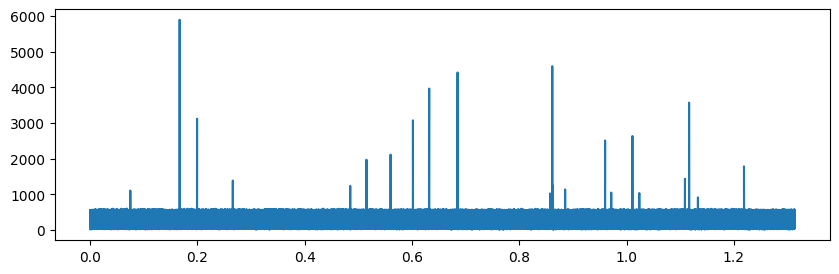

In [163]:
plt.figure(figsize=(10,3))
plt.plot(t,y)
#plt.xlim([0.017,0.0172])

Obtencion de la FFT

In [164]:
Y = fft(y)
f = fftfreq(len(y), 1/Fs)

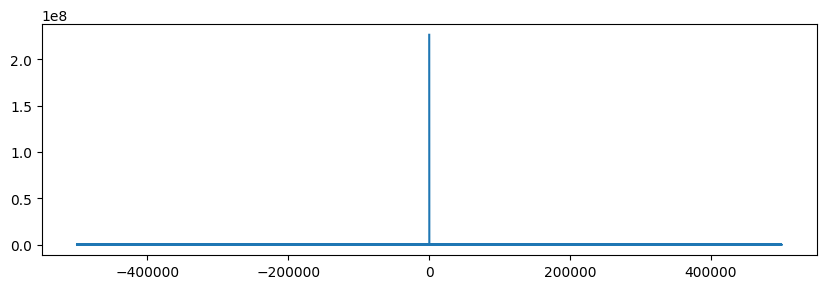

In [165]:
plt.figure(figsize=(10,3))
plt.plot(f,np.abs(Y))

<function matplotlib.pyplot.show(close=None, block=None)>

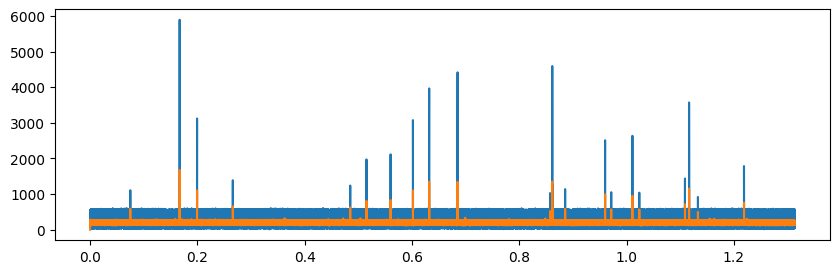

In [166]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
#taps = firwin(100, [30/(2*N), 100/(2*N)], window='hann', pass_zero='bandpass')
taps = firwin(10, [1/(2*Fs), 50000/(2*Fs)], window='hann', pass_zero='bandpass')

# Use lfilter to filter x with the FIR filter.
y_f = lfilter(taps, 1.0, y)

plt.figure(figsize=(10,3))
plt.plot(t,y)
plt.plot(t,y_f)
#plt.xlim([0.017,0.0172])
plt.show

In [167]:
coefs = np.round(taps * 2**10).astype(int)
df = pd.DataFrame(coefs)
df.to_csv('coefs.csv', index=False)

### Implementacion de trapezoidal shaper



In [191]:
K = 5
L = 10
M = 2100

def traps(x):
    y = np.zeros(len(x))
    b = np.zeros(len(x))
    for n in range((K+L),len(x)):
        A = x[n] - x[n-K] - x[n-L] + x[n-K-L]
        b[n] = b[n-1] + A
        C = b[n] + A*M
        
        y[n] = y[n-1] + C

    return y


<function matplotlib.pyplot.show(close=None, block=None)>

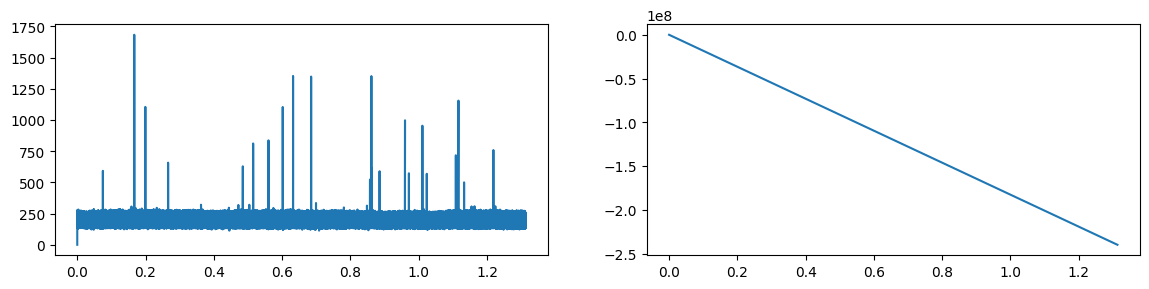

In [192]:
K = 1
L = 10
M = 8

X = traps(y_f)
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.plot(t,y_f)
plt.subplot(1,2,2)
plt.plot(t,X)
#plt.xlim([0.017,0.0172])
plt.show